In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import os

from collections import defaultdict, Counter
sb.set()
plt.style.use("ggplot")

In [170]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Netflix\netflix_titles.csv")
df.dropna(axis = "index", how = "any", inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [183]:
df["country"] = df["country"].str.strip()
df["listed_in"] = df["listed_in"].str.strip()

#for i in df["country"]:
    #df["country"].astype(str).str.strip()
#for i in df["listed_in"]:
    #df["listed_in"].astype(str).str.strip()

In [172]:
df["country"].value_counts()

United States                               1323
India                                        707
United Kingdom                               152
Canada                                        78
Spain                                         72
                                            ... 
United Kingdom, Denmark, Canada, Croatia       1
United Kingdom, Jordan, Qatar, Iran            1
Venezuela                                      1
United Kingdom, Poland, United States          1
United Kingdom, United States, Australia       1
Name: country, Length: 433, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [174]:
df["date_added"] = pd.to_datetime(df["date_added"])#, format = "%b %d, %Y")

In [175]:
df.loc[0, "date_added"]

Timestamp('2019-09-09 00:00:00')

Movie      3678
TV Show      96
Name: type, dtype: int64

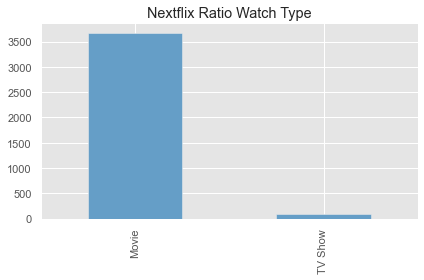

In [176]:
df["type"].value_counts().plot(kind = "bar", color = "#659EC7", title = "Nextflix Ratio Watch Type")
plt.tight_layout()
df["type"].value_counts()

In [177]:
df["release_year"].value_counts()

2017    585
2018    537
2016    514
2019    326
2015    324
       ... 
1956      1
1954      1
1945      1
1944      1
1942      1
Name: release_year, Length: 69, dtype: int64

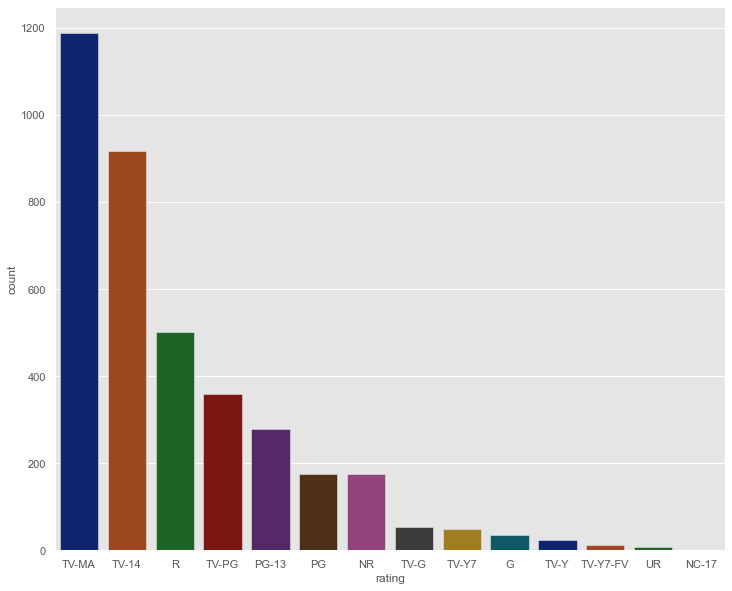

In [178]:
plt.figure(figsize = (12, 10))
ax = sb.countplot(x = "rating", data = df, palette = "dark", order = df["rating"].value_counts().index[0::]) 

In [179]:
df["listed_in"].value_counts()

Dramas, International Movies                                        237
Stand-Up Comedy                                                     234
Dramas, Independent Movies, International Movies                    184
Comedies, Dramas, International Movies                              168
Documentaries                                                       136
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
International TV Shows, TV Dramas, Teen TV Shows                      1
Classic Movies, Cult Movies, Dramas                                   1
Sci-Fi & Fantasy                                                      1
Dramas, Horror Movies, Sci-Fi & Fantasy                               1
Name: listed_in, Length: 296, dtype: int64

In [184]:
df.to_csv(r"D:\Open Classroom\Data Files\Netflix\cleaned_netflix_titles.csv")

In [185]:
stripdf = pd.read_csv(r"D:\Open Classroom\Data Files\Netflix\cleaned_netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [38]:
with open(r"D:\Open Classroom\Datasets\Netflix\cleaned_netflix_titles.csv", encoding = "utf-8") as netflix:
    netflixReader = csv.DictReader(netflix)
    netflixCounter = Counter()
    
    for subscriber in netflixReader:
        netflixCounter.update(subscriber["listed_in"].split(","))
        #netflixCounter.update(subscriber['listed_in'].strip())
        n = dict(zip(netflixCounter, netflixCounter.values()))
#print(n)
print(netflixCounter.most_common(20))

[(' International Movies', 1647), ('Dramas', 1045), ('Comedies', 767), ('Action & Adventure', 583), (' Dramas', 527), (' Independent Movies', 527), (' Romantic Movies', 361), (' Thrillers', 342), ('Children & Family Movies', 304), ('Documentaries', 295), (' Comedies', 291), ('Stand-Up Comedy', 234), ('Horror Movies', 202), (' Music & Musicals', 184), (' Sci-Fi & Fantasy', 175), (' Sports Movies', 116), ('International Movies', 75), ('Classic Movies', 54), (' Horror Movies', 52), (' LGBTQ Movies', 51)]


In [45]:
with open(r"D:\Open Classroom\Datasets\Netflix\cleaned_netflix_titles.csv", encoding = "utf-8") as country:
    countryReader = csv.DictReader(country)
    countryCounter = Counter()
    
    for _ in countryReader:
        country = countryCounter.update(_["country"].split(","))

country = []
fanBase = []

for c in countryCounter.most_common(2000):
    country.append(c[0])
    fanBase.append(c[1])

#for _ in country:
    #_.strip()
    #if _.count() > 1:
       # _.join()
    #print(fanBase)
    #break
    


In [1]:
stripping = "             am on my night job"
print("Before using strip method")
print(stripping)
print()
print("After using strip method")
print(stripping.strip())


Before using strip method
             am on my night job

After using strip method
am on my night job
